# California Housing Prices
Dataset taken from : https://www.kaggle.com/datasets/camnugent/california-housing-prices

The aim of this code is to pre process the data in order to create models with the best scores.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("/Users/Mustapha/Documents/Projet/Formation IA/Dataset/housing.csv")
df.info() # 207 values missing in column "total-bedrooms"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Since only 1% of the the values are missing in total_bedrooms, we can delete these rows

In [23]:
df.dropna(subset=['total_bedrooms'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Detected outliers with percentile: 511
Detected outliers with chi2: 1321


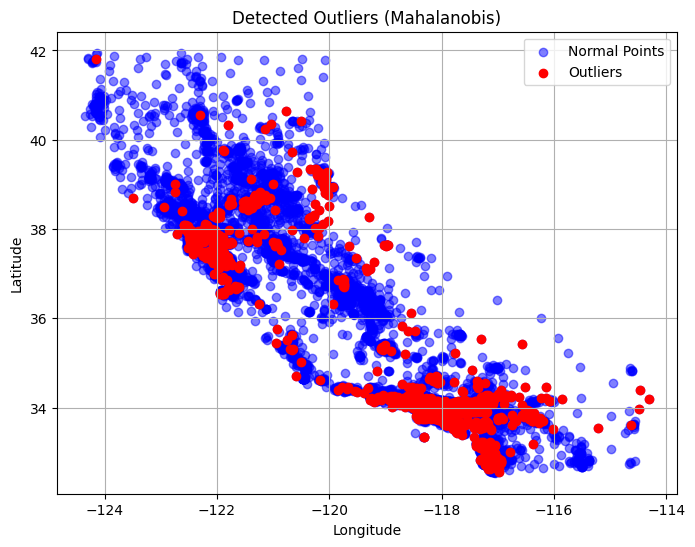

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19112 entries, 0 to 19111
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19112 non-null  float64
 1   latitude            19112 non-null  float64
 2   housing_median_age  19112 non-null  float64
 3   total_rooms         19112 non-null  float64
 4   total_bedrooms      19112 non-null  float64
 5   population          19112 non-null  float64
 6   households          19112 non-null  float64
 7   median_income       19112 non-null  float64
 8   median_house_value  19112 non-null  float64
 9   ocean_proximity     19112 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [35]:
# Choose features
features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value"]
X = df[features].values

# Mahalanobis detection
mean_vec = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

mahal_dist = []
for i in range(X.shape[0]):
    diff = X[i] - mean_vec
    d2 = np.dot(np.dot(diff.T, inv_cov_matrix), diff)
    mahal_dist.append(d2)

mahal_dist = np.array(mahal_dist)

# Treshold (97.5 percentile)
threshold = np.percentile(mahal_dist, 97.5)
outliers = np.where(mahal_dist > threshold)[0]
print(f"Detected outliers with percentile: {len(outliers)}")

from scipy.stats import chi2

# Threshold based on the chi-square law at 97.5% confidence level
df_degrees = X.shape[1]
threshold = chi2.ppf(0.975, df_degrees)

outliers = np.where(mahal_dist > threshold)[0]
print(f"Detected outliers with chi2: {len(outliers)}")

# Visualize outliers on longitude vs latitude graph
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c="blue", alpha=0.5, label="Normal Points")
plt.scatter(df.iloc[outliers]["longitude"], df.iloc[outliers]["latitude"],
            c="red", label="Outliers")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Detected Outliers (Mahalanobis)")
plt.legend()
plt.grid()
plt.show()

# Delete outliers& create a new csv file
df_clean = df.drop(df.index[outliers]).reset_index(drop=True)
df_clean.to_csv("housing_cleaned.csv")
df_clean.info()
